In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the file

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### Knowing the data

In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


### Checking null vaues

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Distribtion of Age and Median Age

<AxesSubplot:xlabel='Age'>

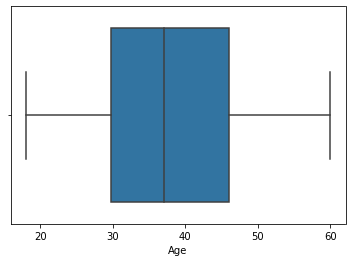

In [7]:
sns.boxplot(x = "Age", data = df)


<AxesSubplot:xlabel='Age', ylabel='Count'>

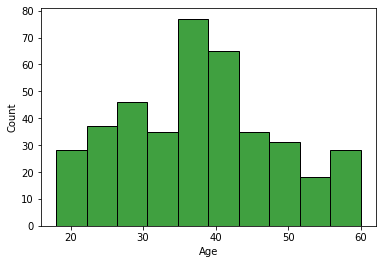

In [8]:
sns.histplot(x='Age',data=df,color="g")

### Pattern of Salary

<AxesSubplot:ylabel='Density'>

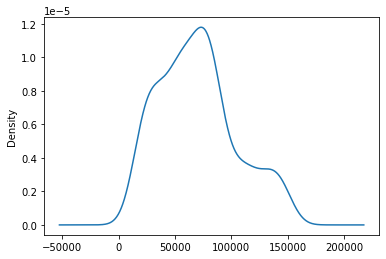

In [9]:
#Analysing the pattern of the estimated salary of the persons in our dataset
df['EstimatedSalary'].plot(kind='kde')


### 1) Salary VS Gender
### 2) Ages VS Gender

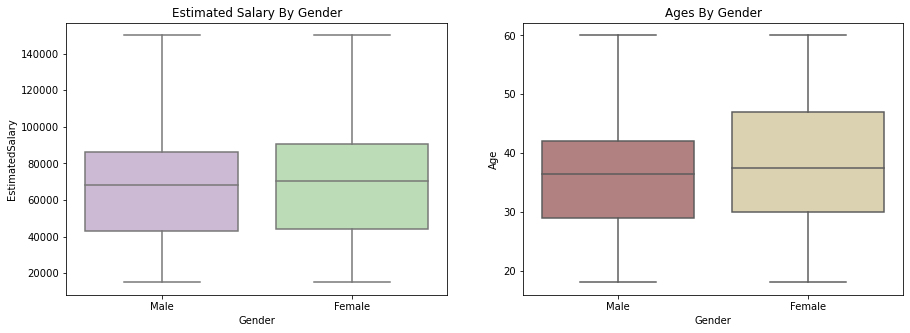

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax=axes[0],x=df['Gender'], y=df['EstimatedSalary'], palette="PRGn")
axes[0].set_title('Estimated Salary By Gender')

sns.boxplot(ax=axes[1],x=df['Gender'], y=df['Age'], palette="pink")
axes[1].set_title('Ages By Gender')
plt.show()

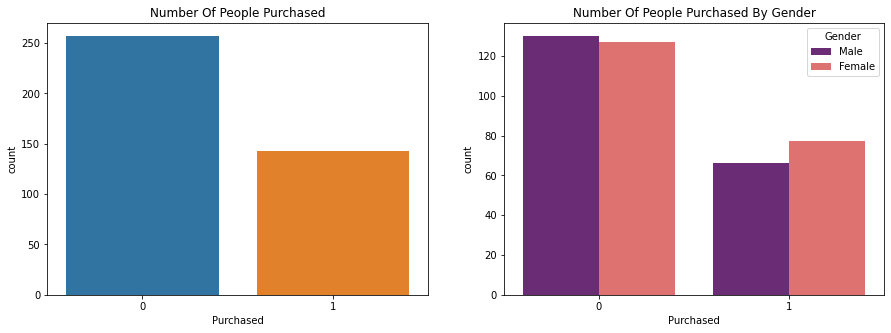

In [11]:
fig ,axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(ax=axes[0],x='Purchased',data=df)
axes[0].set_title('Number Of People Purchased')
sns.countplot(ax=axes[1],x='Purchased',hue='Gender',data=df,palette="magma")
axes[1].set_title('Number Of People Purchased By Gender')
plt.show()

### Correlation

In [12]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


### Heat Map

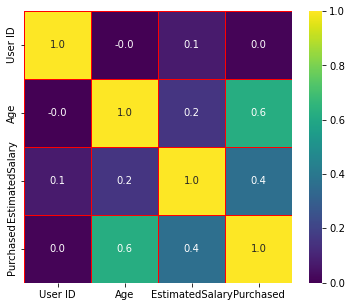

In [13]:
f,ax = plt.subplots(figsize=(6, 5))

sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',cmap='viridis',ax=ax)
plt.show()

## Logistics Regression

### 1) train test split
### 2) Diving the data into train and test spilt

In [14]:

from sklearn.model_selection import train_test_split
X=df[['Age','EstimatedSalary']]
y=df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


### Scaling the data 

In [15]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Importing Logistics Regression 

In [16]:

from sklearn.linear_model import LogisticRegression


### 1) fitting the training data to our model to train our model
### 2) Making predictions

In [17]:

model=LogisticRegression(random_state=0)
model.fit(X_train,y_train)
predictions=model.predict(X_test)

In [18]:
#Checking the performace of the model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

### 1) Confusing matrix - showing 104 correct and 16 incorrect predictions

In [27]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)
# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,74,5
Actual Positive,11,30


In [19]:
print('Confusion Matrix - \n',confusion_matrix(y_test,predictions))
print('\n')
print('Classification Report - \n',classification_report(y_test,predictions))
print('\n')
print('Accuracy Of Our Model -',accuracy_score(y_test,predictions))

Confusion Matrix - 
 [[74  5]
 [11 30]]


Classification Report - 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90        79
           1       0.86      0.73      0.79        41

    accuracy                           0.87       120
   macro avg       0.86      0.83      0.85       120
weighted avg       0.87      0.87      0.86       120



Accuracy Of Our Model - 0.8666666666666667


### AUC

In [20]:
#calculating the AUC value for the classifier model
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
print('The AUC value for the trained classifer on the test set is: ', metrics.auc(fpr, tpr))

The AUC value for the trained classifer on the test set is:  0.8342080889163321


### ROC

In [21]:
#Computing Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
from sklearn.metrics import roc_auc_score
print('Area under the ROC Curve: ' , roc_auc_score(y_test, predictions))

Area under the ROC Curve:  0.8342080889163321


In [22]:
# Computing Average precision score from predicted scores
from sklearn.metrics import average_precision_score
print('The Average Precision score for logistic clasifier is: ',average_precision_score(y_test, predictions) )

The Average Precision score for logistic clasifier is:  0.7188443670150987


### Misclasificaion Rate - ( model incorrectly predicted the outcome of 13 %)

In [ ]:
Misclassification Rate = # incorrect predictions / # total predictions
Misclassification Rate = (false positive + false negative) / (total predictions)
Misclassification Rate = (11 + 5) / (120)
Misclassification Rate = 0.1333